# Module One Partner Project 
### Created by: Andy Luc and Connor Anderson
### Student Pace: Full-Time Data Science
### Scheduled project review date/time: 04/19/2019
### Instructors: Miles Erickson & Greg Damico
### Blog Post URL: dev.to/andy

# Business Case:

2-4 sentences description of the business case. Who cares about this model and how is it going to make the business make money. High level - tell us methodology you used to make your models. (i.e. used multiple linear regression to predict sales price of king county)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Data

#### Source:
#### Timespan of the data (URL): This dataset is from 9/9/2014 - 1/10/2015

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,10/13/2014,12/9/2014,2/25/2015,12/9/2014,2/18/2015
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,NaN,0,0,0,0
view,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


# Data Cleaning

#### Dropping non-numeric values from the `sqft_basement` feature

In [5]:
df['sqft_basement'] = df['sqft_basement'].replace("?",0)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


#### Dropping all records in the Dataframe where values in Waterfront and View are NaN.

#### Also, Dropping Yr_Ren, Lat, and Long. Zipcodes are representative of latitude and longitude so it seemed uneccsesary for our purposes.

In [6]:
df = df[~np.isnan(df['waterfront'])]
df = df[~np.isnan(df['view'])]
df = df.drop(['yr_renovated','lat','long'], axis=1)

'''Changed sqft_basement from an object to a float as sqft represents an actual number'''
df['sqft_basement'] = df['sqft_basement'].astype(float)

'''Changed zipcode from an int to a str, representing a location instead of a number'''
df['zipcode'] = df['zipcode'].astype(str)

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,98053,4760,101930


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19164 entries, 1 to 21596
Data columns (total 18 columns):
id               19164 non-null int64
date             19164 non-null object
price            19164 non-null float64
bedrooms         19164 non-null int64
bathrooms        19164 non-null float64
sqft_living      19164 non-null int64
sqft_lot         19164 non-null int64
floors           19164 non-null float64
waterfront       19164 non-null float64
view             19164 non-null float64
condition        19164 non-null int64
grade            19164 non-null int64
sqft_above       19164 non-null int64
sqft_basement    19164 non-null float64
yr_built         19164 non-null int64
zipcode          19164 non-null object
sqft_living15    19164 non-null int64
sqft_lot15       19164 non-null int64
dtypes: float64(6), int64(10), object(2)
memory usage: 2.8+ MB


#### Note: After dropping NaN records from waterfront and view, `df` used to have 21,597 records, but now it has 19,164.

# Exploratory Data Analysis:
- OLS Model
- Visualization
- Multi-collinearity

## OLS Model 

In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [9]:
f = 'price~ sqft_living'

model = ols(formula=f, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 1.887e+04
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        10:33:22   Log-Likelihood:            -2.6638e+05
No. Observations:               19164   AIC:                         5.328e+05
Df Residuals:                   19162   BIC:                         5.328e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -4.86e+04   4697.110    -10.348      

What did this model predict?

a unit per unit increase in square footage of the home, on avg, it is associated with a $283 inc in selling price of a home. Generally speaking, larger home is associated with a higher selling price.

In [10]:
model.params

Intercept     -48604.077596
sqft_living      283.401625
dtype: float64

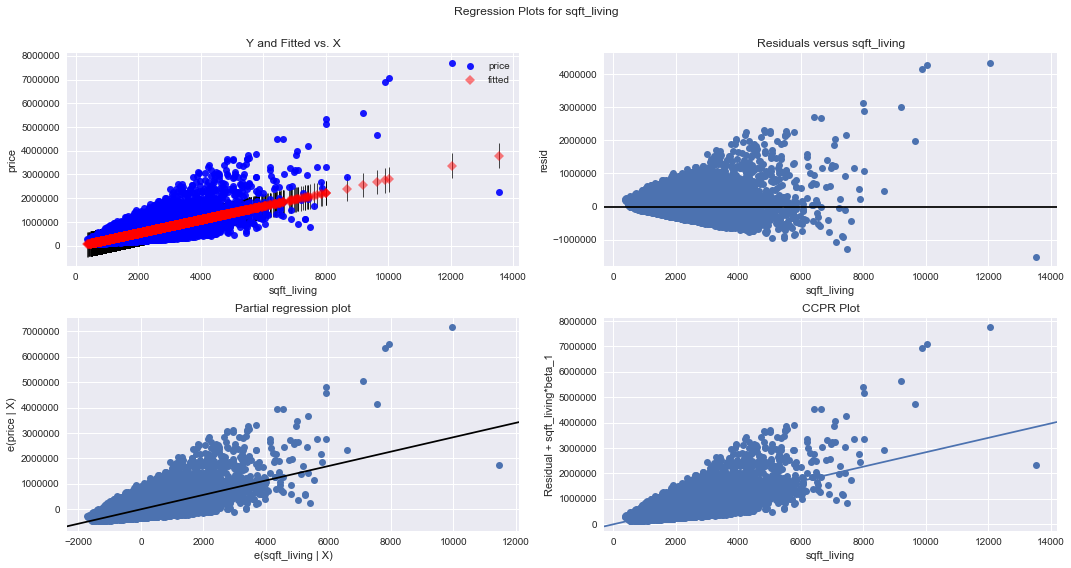

In [11]:
fig = plt.figure(figsize =(15,8))
fig = sm.graphics.plot_regress_exog(model, 'sqft_living', fig=fig)

## Visualization

Pairplot of Sqft Living, Bedrooms, Bathrooms in relation to Price.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


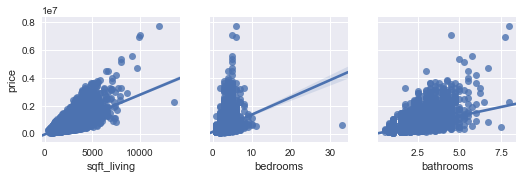

In [12]:
sns.pairplot(df,x_vars=['sqft_living','bedrooms','bathrooms'], y_vars='price', kind='reg')

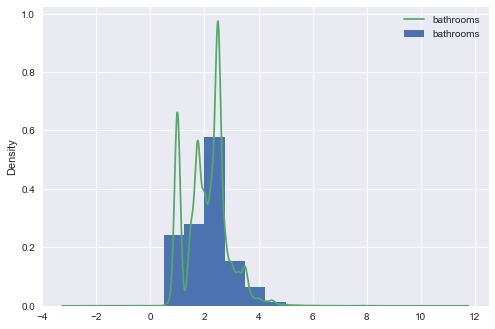

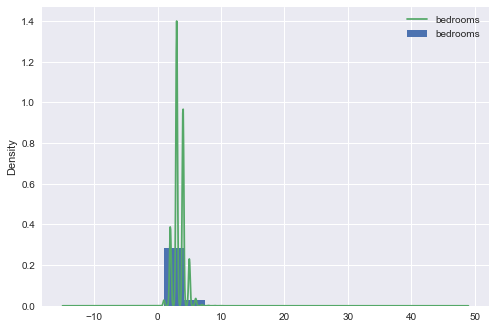

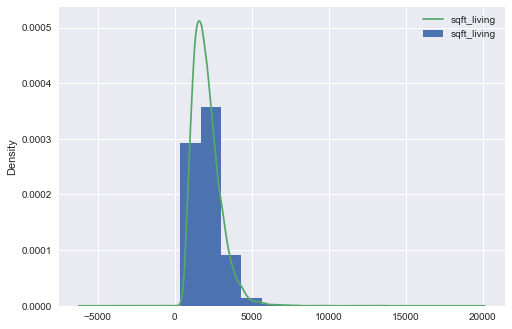

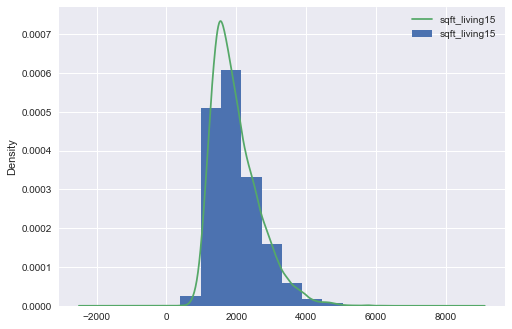

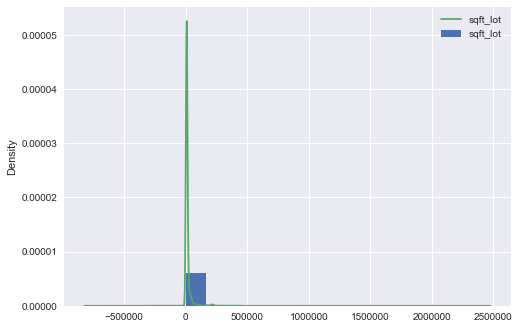

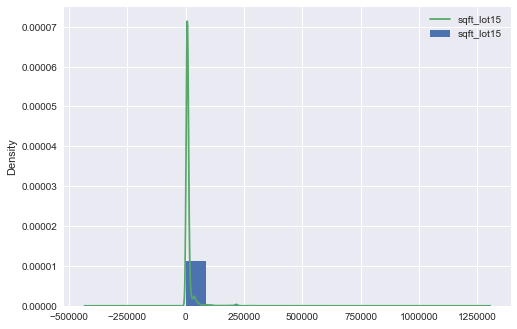

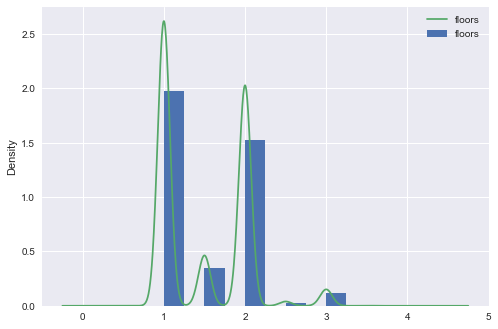

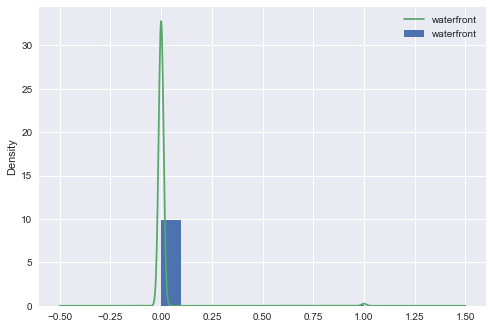

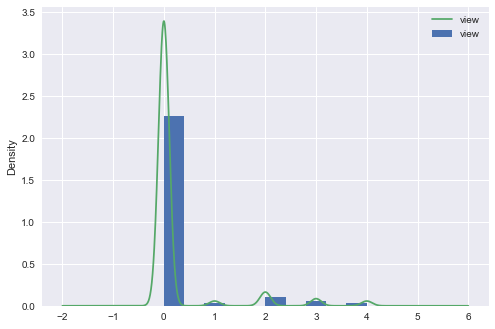

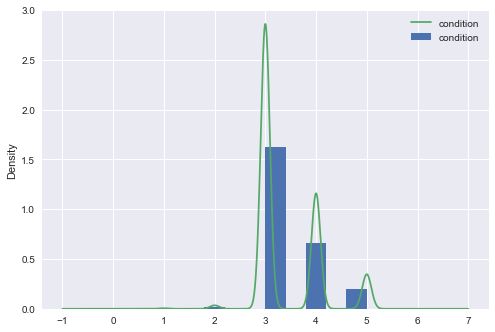

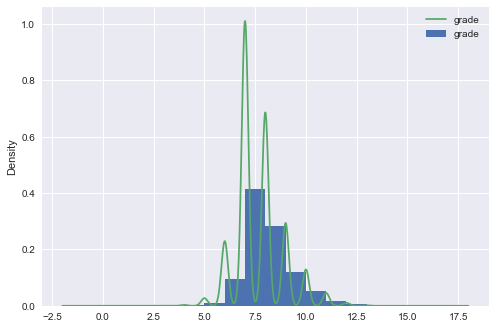

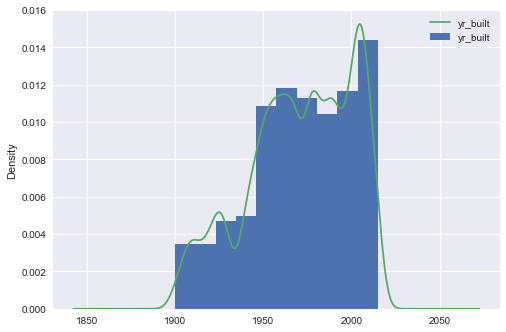

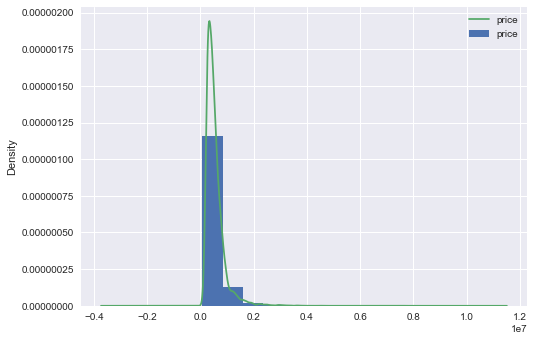

In [13]:
for column in ['bathrooms','bedrooms', 'sqft_living', 'sqft_living15',
               'sqft_lot', 'sqft_lot15', 'floors', 'waterfront', 'view',
               'condition', 'grade', 'yr_built', 'price']:
    df[column].plot.hist(density=True )
    df[column].plot.kde(label=column )
    plt.legend()
    plt.show()

### Based on the histograms shown above:
- SqFt_Living, SqFt_Living15, SqFt_Above, and Yr_Built are all skewed.
- Some outliers we may need to look at are SqFt_Lot and SqFt_Lot15
- Grade is very normal, so it could be a good indicator against price.

## Multi-Collinearity of Features 

Text(0.5, 1.0, 'Multi-Collinearity of Features')

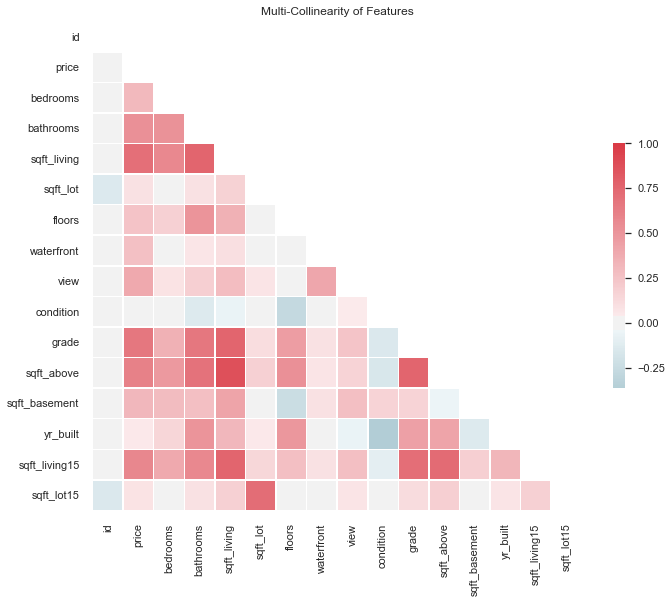

In [14]:
sns.set(style="white")

# Create a covariance matrix
corr = df.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True, 
            linewidth=.5, cbar_kws={'shrink': .5})

ax.set_title('Multi-Collinearity of Features')

In [15]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,98053,4760,101930


In [16]:
df_mc = df.iloc[:, 1:]
df_mc.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
price,1.000000,0.309057,0.526609,0.704428,0.087430,0.258797,0.270982,0.395766,0.037514,0.667719,0.609611,0.318839,0.053433,0.582450,0.081562
bedrooms,0.309057,1.000000,0.516137,0.577972,0.029685,0.181909,-0.004082,0.083542,0.025047,0.359619,0.480400,0.295875,0.157011,0.392586,0.028005
bathrooms,0.526609,0.516137,1.000000,0.755909,0.085666,0.506058,0.064608,0.186980,-0.126612,0.666475,0.687621,0.277739,0.507069,0.569443,0.086466
sqft_living,0.704428,0.577972,0.755909,1.000000,0.173624,0.356938,0.107416,0.285976,-0.057704,0.763701,0.877669,0.427308,0.317123,0.755524,0.183177
sqft_lot,0.087430,0.029685,0.085666,0.173624,1.000000,-0.007519,0.023164,0.071064,-0.013656,0.114968,0.184383,0.014532,0.055560,0.146576,0.721839
floors,0.258797,0.181909,0.506058,0.356938,-0.007519,1.000000,0.021399,0.029147,-0.263421,0.458230,0.525039,-0.238997,0.490251,0.280229,-0.011145
waterfront,0.270982,-0.004082,0.064608,0.107416,0.023164,0.021399,1.000000,0.406654,0.017175,0.085644,0.073500,0.085962,-0.026612,0.087257,0.031958
view,0.395766,0.083542,0.186980,0.285976,0.071064,0.029147,0.406654,1.000000,0.047143,0.248898,0.168695,0.274985,-0.055862,0.276719,0.071207
condition,0.037514,0.025047,-0.126612,-0.057704,-0.013656,-0.263421,0.017175,0.047143,1.000000,-0.144898,-0.155922,0.166899,-0.361988,-0.092609,-0.004996
grade,0.667719,0.359619,0.666475,0.763701,0.114968,0.458230,0.085644,0.248898,-0.144898,1.000000,0.757406,0.165213,0.446364,0.713765,0.120664


#### The chart above is the numerical way of describing the collinearity between features. As we get closer to 1, they are more highly correlated and should not be used in the same model.

In [17]:
abs(df_mc.corr()) > .75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False,True,True,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False


#### The chart above is stating that any feature that has a collinearity of .75 or higher should be dropped from the dataframe to possibly achieve a better predictability model. Hence, any coefficient that has the highest number of "True" should be analyzed.

In [25]:
import sklearn
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [45]:
# Input: 
# df = Dataframe
# Feature_cols - A list of strings referencing each feature

# Output:
# print statements regarding the model output


def models(df, feature_cols):
    '''This is a function that outputs the Intercept, Coefficients, 3 types of Errors, and R-Squared'''
    X = df[feature_cols]
    y = df['price']
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    print(f'Intercept of the regression line:',linreg.intercept_)
    print(f'Coefficients:',linreg.coef_)
    print('\n')
    
    y_pred = linreg.predict(X_test)
    
    print(f'Mean Absolute Error:',round(metrics.mean_absolute_error(y_test, y_pred)))
    print(f'Mean Squared Error:',round(metrics.mean_squared_error(y_test, y_pred)))
    print(f'Root Mean Squared Error:',round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
    print(f'R-Squared:',round(linreg.score(X,y),3))
    

### MODEL 1
Sqft vs Price

In [46]:
models(df=df, feature_cols=['sqft_living'])

Intercept of the regression line: -55125.06936752866
Coefficients: [287.00651047]


Mean Absolute Error: 174657.0
Mean Squared Error: 69429563836.0
Root Mean Squared Error: 263495.0
R-Squared: 0.496


### Model 2
Sqft Living, Bedrooms, Bathrooms vs Price. All of these factors are attributes of the house, and may increase or decrease price depending on whether they increase or decrease.

In [42]:
models(df=df, feature_cols=['sqft_living','bedrooms','bathrooms'])

Intercept of the regression line: 65214.583846670575
Coefficients: [   317.02754621 -55882.33083747   2504.17469615]


Mean Absolute Error: 168657.0
Mean Squared Error: 62294016943.0
Root Mean Squared Error: 249588.0
R-Squared: 0.511


### MODEL 3
SqFt_Living15, Sqft_Lot15, Grade vs Price: These factors were selected to see if there was a correlation between quality of neighborhood vs the price of home.

In [39]:
models(df=df, feature_cols=['sqft_living15','sqft_lot15','grade'])

Intercept of the regression line: -936019.6149931012
Coefficients: [ 1.17514587e+02 -3.10157454e-01  1.62924725e+05]


Mean Absolute Error: 173167.0
Mean Squared Error: 72298881156.0
Root Mean Squared Error: 268885.0
R-Squared: 0.469


### Model 4

## Model Comparison Graph

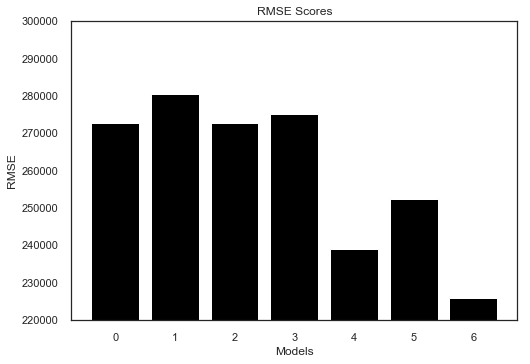

In [44]:
Values ={'Model 1': 272526.5175180645, 'Model 2': 280403.1883537865, 
         'Model 3': 272526.5175180645, 'Model 4': 275061.1093215885, 
         'Model 5': 239004.38679856234, 'Model 6': 252386.96082953044,
        'Model 7': 225867.24350925296}

"""Model 7 is overfit"""
plt.bar(range(len(Values)), list(Values.values()), color = ('Black'))
plt.ylim(220000,300000)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE Scores')
plt.show()

## Model 5 (Final Model)